In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn.functional import relu
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

Change the path below to where your "fer2013" folder is

Example: If fer2013 is located in the Downloads folder, the path looks something like below

In [2]:
train_path = r'C:\Users\nguye\Downloads\fer_2013\train'
test_path = r'C:\Users\nguye\Downloads\fer_2013\test'

In [12]:
if torch.cuda.is_available():
    device = 'cuda'

else:
    device = 'cpu'
print(f'Device is {device}')

Device is cuda


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5)),
     torchvision.transforms.Grayscale(1)
     ])

trainset = datasets.ImageFolder(root=train_path, transform=transform)
testset = datasets.ImageFolder(root=test_path, transform=transform)
train_loader = DataLoader(trainset, shuffle=True)
test_loader = DataLoader(testset, shuffle=True)

In [4]:
train_iter = iter(train_loader)

Feature batch shape: torch.Size([1, 1, 48, 48])
Labels batch shape: torch.Size([1])


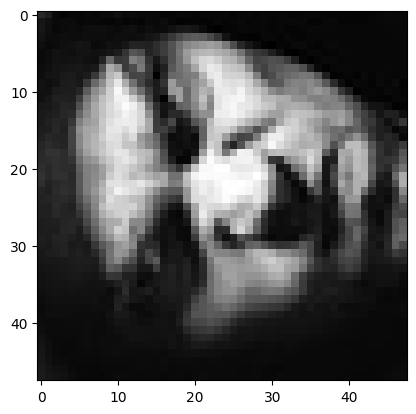

Label: Angry


In [5]:
images, labels = next(train_iter)
labels_map = {
    0:"Angry",
    1:"Disgust",
    2:"Fear",
    3:"Happy", 
    4:"Sad", 
    5:"Surprise", 
    6:"Neutral"
}
print(f"Feature batch shape: {images.size()}")
print(f"Labels batch shape: {labels.size()}")
img = images[0].squeeze()
label = labels[0]
plt.imshow(img.T, cmap="gray")
plt.show()
print(f"Label: {labels_map[int(label)]}")

In [9]:
class FER_Classifer(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, (3,3)),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 64, (3,3)),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(4096, 20),
            nn.ReLU(),
            nn.Linear(20,7)  
        )
 
    def forward(self,x):
        return self.model(x)

In [20]:
import torch.optim as optim

clf = FER_Classifer()
clf.to('cuda' if torch.cuda.is_available() else 'cpu')
criteria = nn.CrossEntropyLoss()
opt = optim.SGD(clf.parameters(), lr=0.01)

In [21]:
training_loss = []
for epoch in range(30):
    running_loss = 0
    for index, data in enumerate(train_loader, 0):
        images, labels = data[0].to(device), data[1].to(device)
        opt.zero_grad()

        outputs = clf(images)
        loss = criteria(outputs, labels)
        loss.backward()
        opt.step()
        running_loss+= loss.item()
        
        if index % 2000 == 1999:  
            print(f'[{epoch + 1}, {index + 1:5d}] loss: {running_loss / 2000:.3f}')
            training_loss.append(running_loss/2000)
            running_loss = 0.0



[1,  2000] loss: 1.815
[1,  4000] loss: 1.751
[1,  6000] loss: 1.686
[1,  8000] loss: 1.690
[1, 10000] loss: 1.636
[1, 12000] loss: 1.606
[1, 14000] loss: 1.579
[1, 16000] loss: 1.558
[1, 18000] loss: 1.535
[1, 20000] loss: 1.514
[1, 22000] loss: 1.469
[1, 24000] loss: 1.461
[1, 26000] loss: 1.498
[1, 28000] loss: 1.463
[2,  2000] loss: 1.421
[2,  4000] loss: 1.379
[2,  6000] loss: 1.424
[2,  8000] loss: 1.401
[2, 10000] loss: 1.378
[2, 12000] loss: 1.348
[2, 14000] loss: 1.335
[2, 16000] loss: 1.339
[2, 18000] loss: 1.360
[2, 20000] loss: 1.371
[2, 22000] loss: 1.348
[2, 24000] loss: 1.324
[2, 26000] loss: 1.375
[2, 28000] loss: 1.364
[3,  2000] loss: 1.309
[3,  4000] loss: 1.281
[3,  6000] loss: 1.263
[3,  8000] loss: 1.289
[3, 10000] loss: 1.269
[3, 12000] loss: 1.286
[3, 14000] loss: 1.292
[3, 16000] loss: 1.276
[3, 18000] loss: 1.207
[3, 20000] loss: 1.290
[3, 22000] loss: 1.262
[3, 24000] loss: 1.268
[3, 26000] loss: 1.254
[3, 28000] loss: 1.296
[4,  2000] loss: 1.205
[4,  4000] 

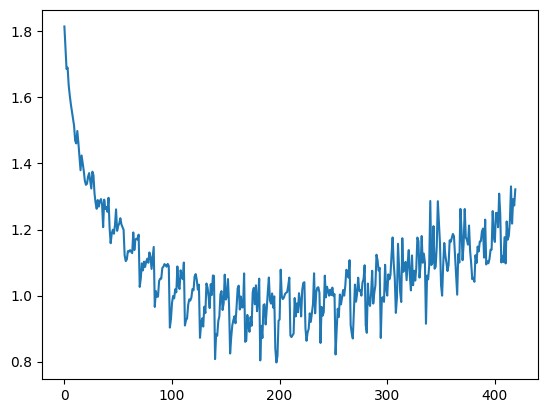

In [22]:
plt.plot(training_loss, label = 'train_loss')

In [ ]:
torch.save(clf.state_dict(), r'C:\Users\nguye\Downloads\ModernAI\fer.pth')

In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device),data[1].to(device)
        # calculate outputs by running images through the network
        outputs = clf(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 44 %
